In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import warnings
import time
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
# ignore python warnings
warnings.filterwarnings("ignore")

In [14]:
seed = 101

In [15]:
featureNames = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'class']
df = pd.read_csv(r'dataset/creditcard.csv', header=None, names=featureNames)

In [16]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.758743e-12 -8.252298e-13 -9.636929e-13  8.316157e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.591952e-13  4.247354e-13 -3.050180e-13  8.693344e-14 -1.179712e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.406543e-13 -5.713163e-13 -9.725303e-13  1.464139e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.989087e-13 -5.615260e-13  3.332112e-12 -3.518886e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [17]:
X = df
y = X.pop('class')
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor features
0          2.3     Time
1          1.6       V1
2          3.9       V2
3          1.3       V3
4          1.1       V4
5          2.8       V5
6          1.5       V6
7          2.5       V7
8          1.1       V8
9          1.0       V9
10         1.1      V10
11         1.0      V11
12         1.0      V12
13         1.0      V13
14         1.0      V14
15         1.0      V15
16         1.0      V16
17         1.0      V17
18         1.0      V18
19         1.0      V19
20         2.2      V20
21         1.1      V21
22         1.1      V22
23         1.1      V23
24         1.0      V24
25         1.0      V25
26         1.0      V26
27         1.0      V27
28         1.0      V28
29        11.5   Amount

Text(0.5, 1.0, 'Class Frequency\n0: Legal\n1: Fraud')

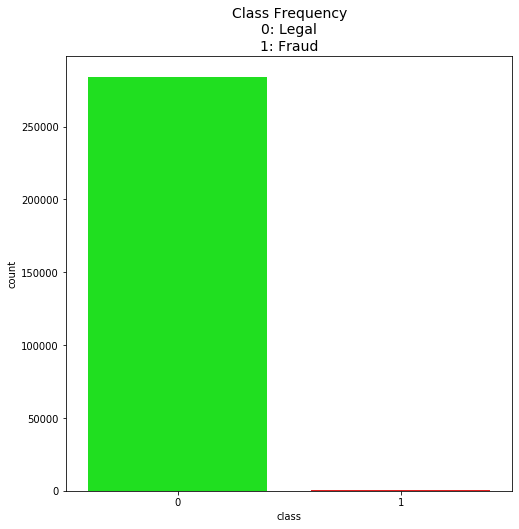

In [5]:
colors = ["#00FF00", "#FF0000"]
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot('class', data=df,ax=ax, palette=colors)
plt.title('Class Frequency\n0: Legal\n1: Fraud', fontsize=14)

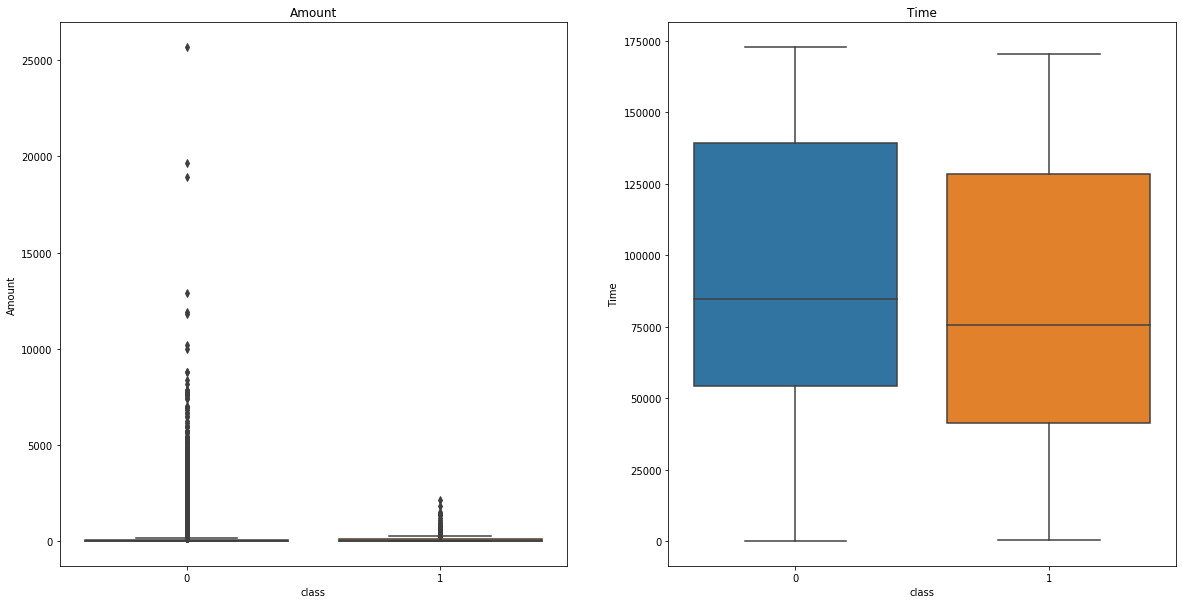

In [6]:
f, axes = plt.subplots(1, 2, figsize=(20,10))
sns.boxplot(x="class", y="Amount", data=df, ax=axes[0]).set_title('Amount')
sns.boxplot(x="class", y="Time", data=df, ax=axes[1]).set_title('Time')
plt.show()

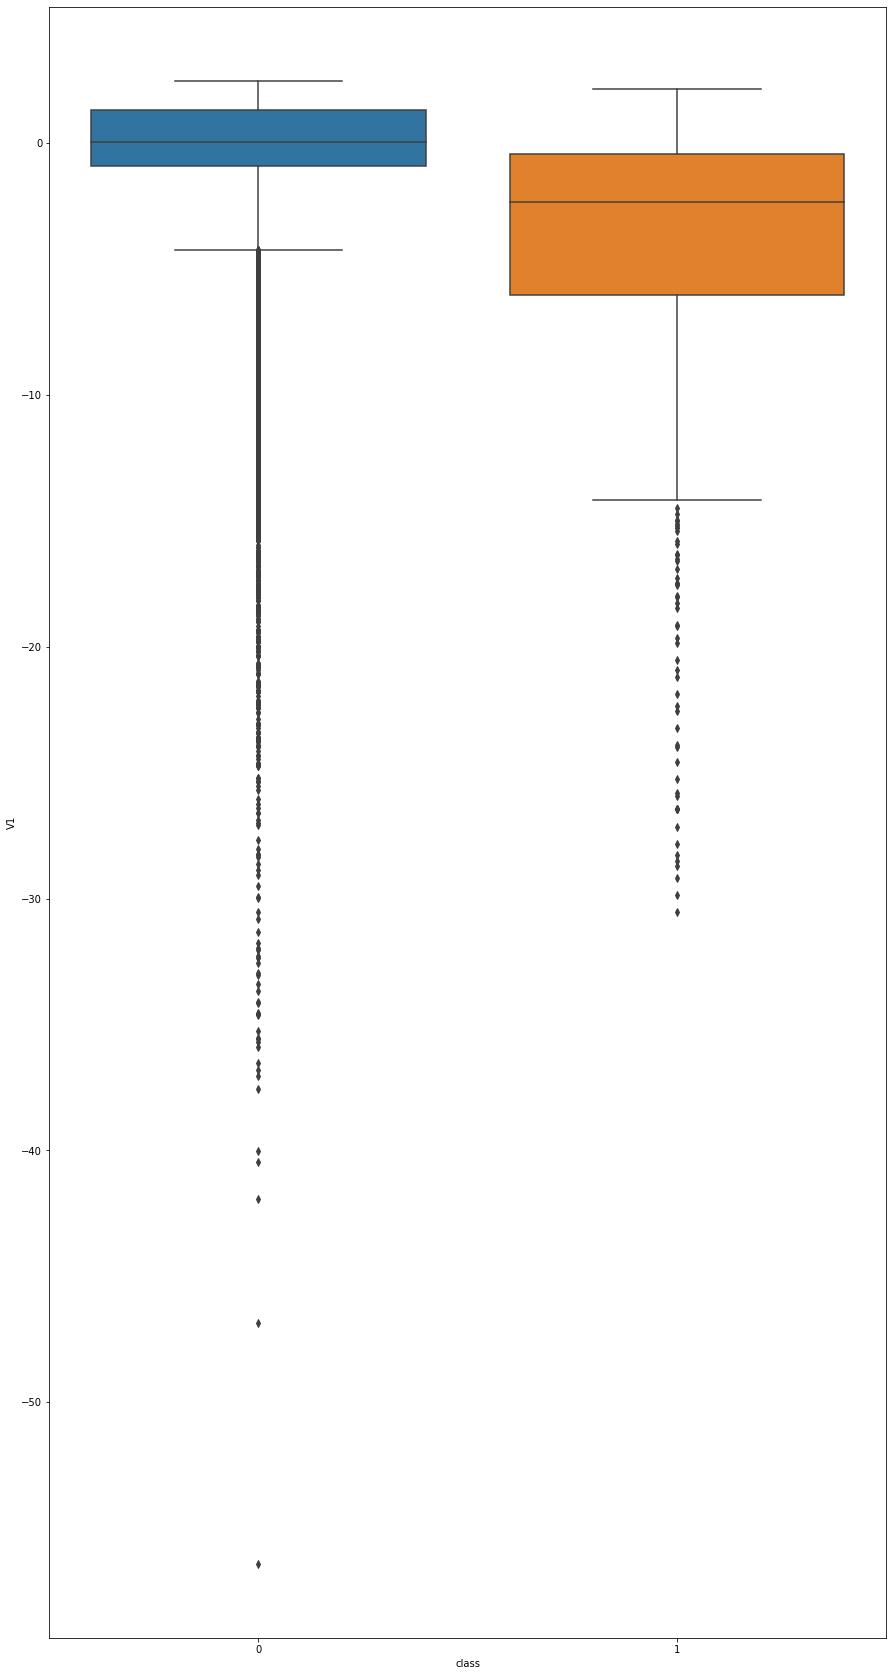

In [7]:
rows = 1
cols = 1
v = 1
f, axes = plt.subplots(rows, cols, figsize=(15,30))
for i in range(rows):
    for j in range(cols):
        if rows == 1 & cols != 1:
            sns.boxplot(x="class", y="V"+str(v), data=df, ax=axes[j])
        elif cols == 1 & rows != 1:
            sns.boxplot(x="class", y="V"+str(v), data=df, ax=axes[i])
        elif rows == 1 & cols == 1:
            sns.boxplot(x="class", y="V"+str(v), data=df, ax=axes)
        else:
            sns.boxplot(x="class", y="V"+str(v), data=df, ax=axes[i][j])
        v = v+1

plt.show()

## Outlier Removal
This is done via looking at the boxplot for each feature

In [8]:
def removeOutlier(df, col_name, threshold, upper=True):    
    if(upper==True):
        df = df.drop(df[(df[col_name] > threshold)].index)
    else:
        df = df.drop(df[(df[col_name] < threshold)].index)
    return df
    
df = removeOutlier(df, 'Amount', 5000)
df = removeOutlier(df, 'V3', 5)
df = removeOutlier(df, 'V3', -30, False)
df = removeOutlier(df, 'V5', -40, False)
df = removeOutlier(df, 'V6', 30)
df = removeOutlier(df, 'V7', 50)
df = removeOutlier(df, 'V8', -45, False)
df = removeOutlier(df, 'V9', 10)
df = removeOutlier(df, 'V10', 20)
df = removeOutlier(df, 'V12', 5)
df = removeOutlier(df, 'V13', 5)
df = removeOutlier(df, 'V13', -5, False)
df = removeOutlier(df, 'V15', 7)
df = removeOutlier(df, 'V15', -4, False)
df = removeOutlier(df, 'V16', 10)
df = removeOutlier(df, 'V19', -5, False)
df = removeOutlier(df, 'V20', -40, False)
df = removeOutlier(df, 'V20', 30)
df = removeOutlier(df, 'V21', 25)
df = removeOutlier(df, 'V21', -30, False)
df = removeOutlier(df, 'V22', -7.5, False)
df = removeOutlier(df, 'V22', 7.5)
df = removeOutlier(df, 'V25', -8, False)
df = removeOutlier(df, 'V27', 15)
df = removeOutlier(df, 'V27', -15, False)
df = removeOutlier(df, 'V28', 15)
df = removeOutlier(df, 'V28', -11, False)
df = df.reset_index()
df = df.drop(columns=['index'])

In [9]:
df.describe()

Time             V1             V2             V3  \
count  284689.000000  284689.000000  284689.000000  284689.000000   
mean    94817.720902       0.006843       0.003984       0.004399   
std     47487.135338       1.918346       1.593598       1.488259   
min         0.000000     -46.855047     -48.060856     -29.468732   
25%     54208.000000      -0.919300      -0.598049      -0.888820   
50%     84692.000000       0.018855       0.065654       0.180304   
75%    139323.000000       1.315771       0.803625       1.027518   
max    172792.000000       2.454930      16.697832       4.226108   

                  V4             V5             V6             V7  \
count  284689.000000  284689.000000  284689.000000  284689.000000   
mean       -0.002074       0.004546      -0.002393      -0.001887   
std         1.410054       1.328279       1.312599       1.153981   
min        -5.683171     -25.772800     -23.496714     -33.239328   
25%        -0.848842      -0.690857      -0.768377      -0.553976   
50%        -0.020483      -0.054054      -0.274496       0.039952   
75%         0.742131       0.612093       0.397716       0.570052   
max        13.143668      34.099309      16.355534      24.664527   

                  V8             V9  ...            V21            V22  \
count  284689.000000  284689.000000  ...  284689.000000  284689.000000   
mean        0.003477       0.000041  ...      -0.000265       0.000488   
std         1.140241       1.094420  ...       0.697539       0.720347   
min       -41.484823     -10.842526  ...     -20.262054      -7.417140   
25%        -0.208300      -0.642858  ...      -0.228329      -0.542144   
50%         0.022505      -0.051330  ...      -0.029450       0.006878   
75%         0.327422       0.596993  ...       0.186259       0.528514   
max        18.748872       9.272376  ...      20.063786       7.057496   

                 V23            V24            V25            V26  \
count  284689.000000  284689.000000  284689.000000  284689.000000   
mean        0.000094      -0.000086      -0.000012       0.000066   
std         0.591732       0.605443       0.518525       0.482022   
min       -36.666000      -2.836627      -7.495741      -1.855355   
25%        -0.161794      -0.354558      -0.317082      -0.326958   
50%        -0.011193       0.040913       0.016489      -0.052102   
75%         0.147576       0.439426       0.350638       0.240974   
max        22.083545       4.022866       6.070850       3.517346   

                 V27            V28         Amount          class  
count  284689.000000  284689.000000  284689.000000  284689.000000  
mean        0.000337      -0.001039      86.837805       0.001672  
std         0.388165       0.294044     220.264261       0.040856  
min        -9.390980      -8.656570       0.000000       0.000000  
25%        -0.070788      -0.052956       5.590000       0.000000  
50%         0.001353       0.011228      22.000000       0.000000  
75%         0.091017       0.078215      77.050000       0.000000  
max        10.507884      14.974180    4959.850000       1.000000  

[8 rows x 31 columns]

## Scaling
`Amount` and `Time` can now be scaled

In [10]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [11]:
p_test = pd.DataFrame(columns=['name', 'p-value'])
p_values = []
p_names = []
for column in df:
   stat, p = stats.shapiro(df[column])
   p_names.append(column)
   p_values.append(p)
   
for i in range(len(p_values)):
    p_test.loc[i] = [p_names[i]] + [p_values[i]]
p_test

name       p-value
0     Time  0.000000e+00
1       V1  0.000000e+00
2       V2  0.000000e+00
3       V3  0.000000e+00
4       V4  0.000000e+00
5       V5  0.000000e+00
6       V6  0.000000e+00
7       V7  0.000000e+00
8       V8  0.000000e+00
9       V9  0.000000e+00
10     V10  0.000000e+00
11     V11  0.000000e+00
12     V12  0.000000e+00
13     V13  7.500075e-30
14     V14  0.000000e+00
15     V15  0.000000e+00
16     V16  0.000000e+00
17     V17  0.000000e+00
18     V18  0.000000e+00
19     V19  0.000000e+00
20     V20  0.000000e+00
21     V21  0.000000e+00
22     V22  0.000000e+00
23     V23  0.000000e+00
24     V24  0.000000e+00
25     V25  0.000000e+00
26     V26  0.000000e+00
27     V27  0.000000e+00
28     V28  0.000000e+00
29  Amount  0.000000e+00
30   class  0.000000e+00

In [12]:
X = df
y = X.pop('class')
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor features
0          1.9     Time
1          1.4       V1
2          2.9       V2
3          1.5       V3
4          1.1       V4
5          2.1       V5
6          1.3       V6
7          1.9       V7
8          1.1       V8
9          1.0       V9
10         1.1      V10
11         1.1      V11
12         1.0      V12
13         1.0      V13
14         1.0      V14
15         1.1      V15
16         1.0      V16
17         1.0      V17
18         1.0      V18
19         1.0      V19
20         1.7      V20
21         1.1      V21
22         1.1      V22
23         1.1      V23
24         1.0      V24
25         1.1      V25
26         1.0      V26
27         1.0      V27
28         1.0      V28
29         6.1   Amount

## Creating sub-dataframes
Create 200 sub-dataframes consisting of the full minority samples and a group of majority samples

In [13]:
minority = df[df['class'] == 1]
majority = df[df['class'] == 0]

## Creating Model

In [14]:
# Classifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

# Parameter decider
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [15]:
# these model parameters are selected after performing GridSearchCV in the past
clf = []
clf_name = ['lr', 'svm', 'mlp', 'dt', 'knn']
clf.append(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=seed, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False))
clf.append(SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
                kernel='rbf', max_iter=-1, probability=False, random_state=seed,
                shrinking=True, tol=0.001, verbose=False))
clf.append(MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(24,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=seed, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False))
clf.append(DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=seed, splitter='random'))
clf.append(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform'))

In [16]:
res = []
res_name = ['smote', 'bsmote', 'adasyn', 'ros', 'rus', 'tl', 'noRes']
res.append(SMOTE(random_state=seed))
res.append(BorderlineSMOTE(random_state=seed))
res.append(ADASYN(random_state=seed))
res.append(RandomOverSampler(random_state=seed))
res.append(RandomUnderSampler(random_state=seed))
res.append(TomekLinks(sampling_strategy='majority', random_state=seed))
res.append(None)

In [17]:
# 200 rounds, 5 cv, 6+1 resampling, 5 classifier
scores = [None] * 200
for cv in range(len(scores)):
    scores[cv] = [None] * 5
    for i in range(len(scores[cv])):
        scores[cv][i] = [None] * len(res)
        for j in range(len(scores[cv][i])):
            scores[cv][i][j] = [None] * len(clf)

## Assigning Model to sub-dataframe

In [18]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def GetMetrics(estimator, X, y):
    y_pred = estimator.predict(X)
    acc = accuracy_score(y, y_pred)
    pre, rec, fs, sup = precision_recall_fscore_support(y, y_pred)
    return acc, pre, rec, fs

In [26]:
#this will take approximately 6000 seconds to run
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
kf = KFold(n_splits=200, random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
pca = PCA()
round_index = 0
for train_index, test_index in kf.split(majority):
    time1 = time.time()
    # get data from test_index only
    new_majority = majority.iloc[test_index]
    frames = [minority, new_majority]
    new_df = pd.concat(frames)
    new_df = new_df.reset_index()
    new_df = new_df.drop(columns=['index'])
    
    X = new_df.drop(columns=['class'])
    y = new_df['class']
    cross_index = 0


    acc_score_ = []
    train_acc_score_ = []
    time_score_ = []
    components = range(1,31)
    acc_max_ = []
    acc_min_ = []
    train_acc_max_ = []
    train_acc_min_ = []
    time_max_ = []
    time_min_ = []
    for com in components:
        pca = PCA(com)
        acc_score = []
        train_acc_score = []
        time_score = []

        train_acc_max = 0
        train_acc_min = 100
        acc_max = 0
        acc_min = 100
        time_max = 0
        time_min = 100
        for train_index, test_index in skf.split(X, y):
            logreg = LogisticRegression()
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            pca.fit(X_train)
            new_X_train = pca.transform(X_train)
            new_X_test = pca.transform(X_test)

            time1 = time.time()
            logreg.fit(new_X_train, y_train)
            time2 = time.time()

            trainScore = logreg.score(new_X_train, y_train)
            testScore = logreg.score(new_X_test, y_test)
            time_lapsed = time2 - time1

            train_acc_score.append(trainScore)
            acc_score.append(testScore)
            time_score.append(time_lapsed)

            if(trainScore > train_acc_max):
                train_acc_max = trainScore
            if(trainScore < train_acc_min):
                train_acc_min = trainScore
            if(testScore > acc_max):
                acc_max = testScore
            if(testScore < acc_min):
                acc_min = testScore
            if(time_lapsed > time_max):
                time_max = time_lapsed
            if(time_lapsed < time_min):
                time_min = time_lapsed
        acc_score_.append(np.mean(acc_score))
        acc_max_.append(acc_max)
        acc_min_.append(acc_min)

        train_acc_score_.append(np.mean(train_acc_score))
        train_acc_max_.append(train_acc_max)
        train_acc_min_.append(train_acc_min)

        time_score_.append(np.mean(time_score))
        time_max_.append(time_max)
        time_min_.append(time_min)
    break


In [27]:
lamp = pd.DataFrame(columns=["variance", "training accuracy", "testing accuracy", "running_time"])

   
for i in range(len(train_acc_score_)):
    lamp.loc[i] = [np.cumsum(pca.explained_variance_ratio_)[i]] + [train_acc_score_[i]] + [acc_score_[i]] + [time_score_[i]]
lamp

variance  training accuracy  testing accuracy  running_time
0   0.695250           0.949421          0.948365      0.003397
1   0.758855           0.955743          0.952594      0.004800
2   0.815645           0.957324          0.956809      0.006199
3   0.854299           0.957456          0.956807      0.008994
4   0.883382           0.958773          0.957335      0.008193
5   0.898010           0.958905          0.957860      0.008996
6   0.910138           0.960617          0.960496      0.011592
7   0.920838           0.961802          0.961016      0.010993
8   0.928967           0.962988          0.961541      0.014395
9   0.936481           0.963778          0.962597      0.010793
10  0.943320           0.964173          0.961019      0.008996
11  0.949931           0.964700          0.963133      0.010994
12  0.955761           0.968256          0.964706      0.010594
13  0.961171           0.968388          0.964181      0.012390
14  0.966261           0.969705          0.965232      0.012998
15  0.970950           0.970232          0.964710      0.011394
16  0.975276           0.970891          0.965237      0.011392
17  0.979410           0.972998          0.968925      0.010992
18  0.982674           0.973921          0.968926      0.012591
19  0.985642           0.974053          0.967347      0.011192
20  0.988301           0.974184          0.968926      0.012592
21  0.990686           0.975633          0.969454      0.013990
22  0.992820           0.976424          0.970508      0.015990
23  0.994726           0.979058          0.973144      0.013791
24  0.996245           0.978663          0.973672      0.015592
25  0.997576           0.979189          0.973145      0.016788
26  0.998600           0.979453          0.974198      0.017986
27  0.999215           0.985117          0.978408      0.018587
28  0.999698           0.995258          0.991055      0.020389
29  1.000000           0.995258          0.991055      0.019388

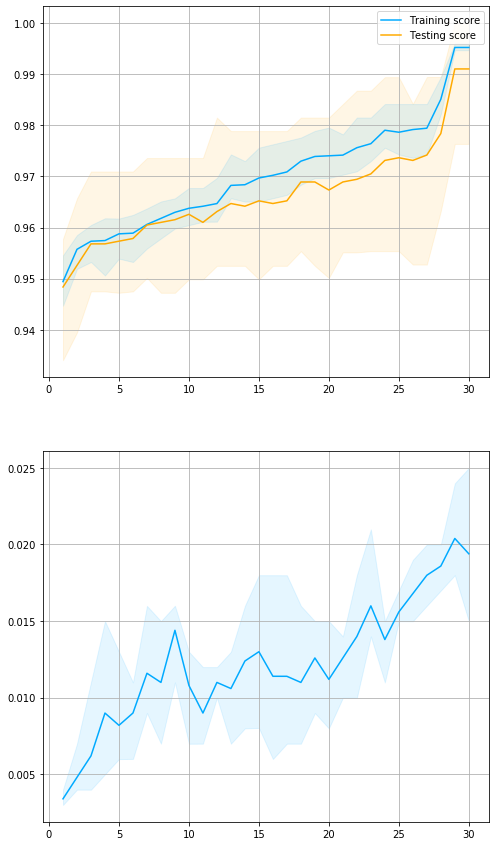

In [29]:
f, ax = plt.subplots(2,1, figsize=(8,15))

ax[0].fill_between(components, list(np.array(acc_max_)), list(np.array(acc_min_)) , alpha=0.1, color="#ffaa00")
ax[0].fill_between(components, list(np.array(train_acc_max_)), list(np.array(train_acc_min_)) , alpha=0.1, color="#00aaff")

ax[0].plot(components, train_acc_score_, color="#00aaff", label="Training score")
ax[0].plot(components, acc_score_, color="#ffaa00", label="Testing score")

ax[0].legend()
ax[0].grid(True)

ax[1].fill_between(components, list(np.array(time_max_)), list(np.array(time_min_)) , alpha=0.1, color="#00aaff")

ax[1].plot(components, time_score_, color="#00aaff")
ax[1].grid(True)

In [55]:
#this will take approximately 6000 seconds to run
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
kf = KFold(n_splits=200, random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
# 70% explained variance
pca = PCA(.70)

round_index = 0
for train_index, test_index in kf.split(majority):
    time1 = time.time()
    # get data from test_index only
    new_majority = majority.iloc[test_index]
    frames = [minority, new_majority]
    new_df = pd.concat(frames)
    new_df = new_df.reset_index()
    new_df = new_df.drop(columns=['index'])
    
    X = new_df.drop(columns=['class'])
    y = new_df['class']
    cross_index = 0
    for train_index2, test_index2 in skf.split(X, y):
        X_train, X_test = X.iloc[train_index2], X.iloc[test_index2]
        y_train, y_test = y[train_index2], y[test_index2]

        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)

        for i in range(len(res)):
            if i == len(res) - 1:
                X_res, y_res = X_train, y_train
            else:
                X_res, y_res = res[i].fit_resample(X_train, y_train)
            for j in range(len(clf)):
                classifier = clf[j].fit(X_res, y_res)
                scores[round_index][cross_index][i][j] = GetMetrics(classifier, X_test, y_test)
        cross_index = cross_index + 1
    time2=time.time()
    print('round {} took {:.2f}'.format(round_index+1, time2-time1))
    round_index = round_index + 1

round 1 took 30.30
round 2 took 28.06
round 3 took 28.12
round 4 took 27.17
round 5 took 28.47
round 6 took 26.86
round 7 took 27.70
round 8 took 26.87
round 9 took 25.41
round 10 took 26.13
round 11 took 27.01
round 12 took 27.24
round 13 took 27.00
round 14 took 27.19
round 15 took 26.70
round 16 took 27.25
round 17 took 26.50
round 18 took 26.45
round 19 took 26.93
round 20 took 26.88
round 21 took 26.91
round 22 took 27.54
round 23 took 27.10
round 24 took 27.09
round 25 took 26.47
round 26 took 25.67
round 27 took 25.53
round 28 took 26.97
round 29 took 27.40
round 30 took 26.38
round 31 took 27.47
round 32 took 27.03
round 33 took 26.45
round 34 took 27.14
round 35 took 27.15
round 36 took 26.41
round 37 took 26.73
round 38 took 26.34
round 39 took 26.71
round 40 took 26.14
round 41 took 26.98
round 42 took 26.91
round 43 took 26.19
round 44 took 26.72
round 45 took 27.16
round 46 took 26.53
round 47 took 26.91
round 48 took 27.14
round 49 took 27.16
round 50 took 26.90
round 51 

In [56]:
def autolabel(rects, axes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 3)
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [57]:
clf_accs = []
clf_recs = []
clf_recs_major = []
for index in range(len(clf)):
    acc = []
    rec = []
    rec_major = []
    for round_index in range(200):
        for cross in range(5):
            for i in range(len(res)):
                acc.append(scores[round_index][cross][i][index][0])
                rec.append(scores[round_index][cross][i][index][2][1])
                rec_major.append(scores[round_index][cross][i][index][2][0])
    clf_accs.append(np.mean(acc))
    clf_recs.append(np.mean(rec))
    clf_recs_major.append(np.mean(rec_major))

In [58]:
res_accs = []
res_recs = []
res_recs_major = []
for index in range(len(res)):
    acc = []
    rec = []
    rec_major = []
    for round_index in range(200):
        for cross in range(5):
            for i in range(len(clf)):
                acc.append(scores[round_index][cross][index][i][0])
                rec.append(scores[round_index][cross][index][i][2][1])
                rec_major.append(scores[round_index][cross][index][i][2][0])
    res_accs.append(np.mean(acc))
    res_recs.append(np.mean(rec))
    res_recs_major.append(np.mean(rec_major))

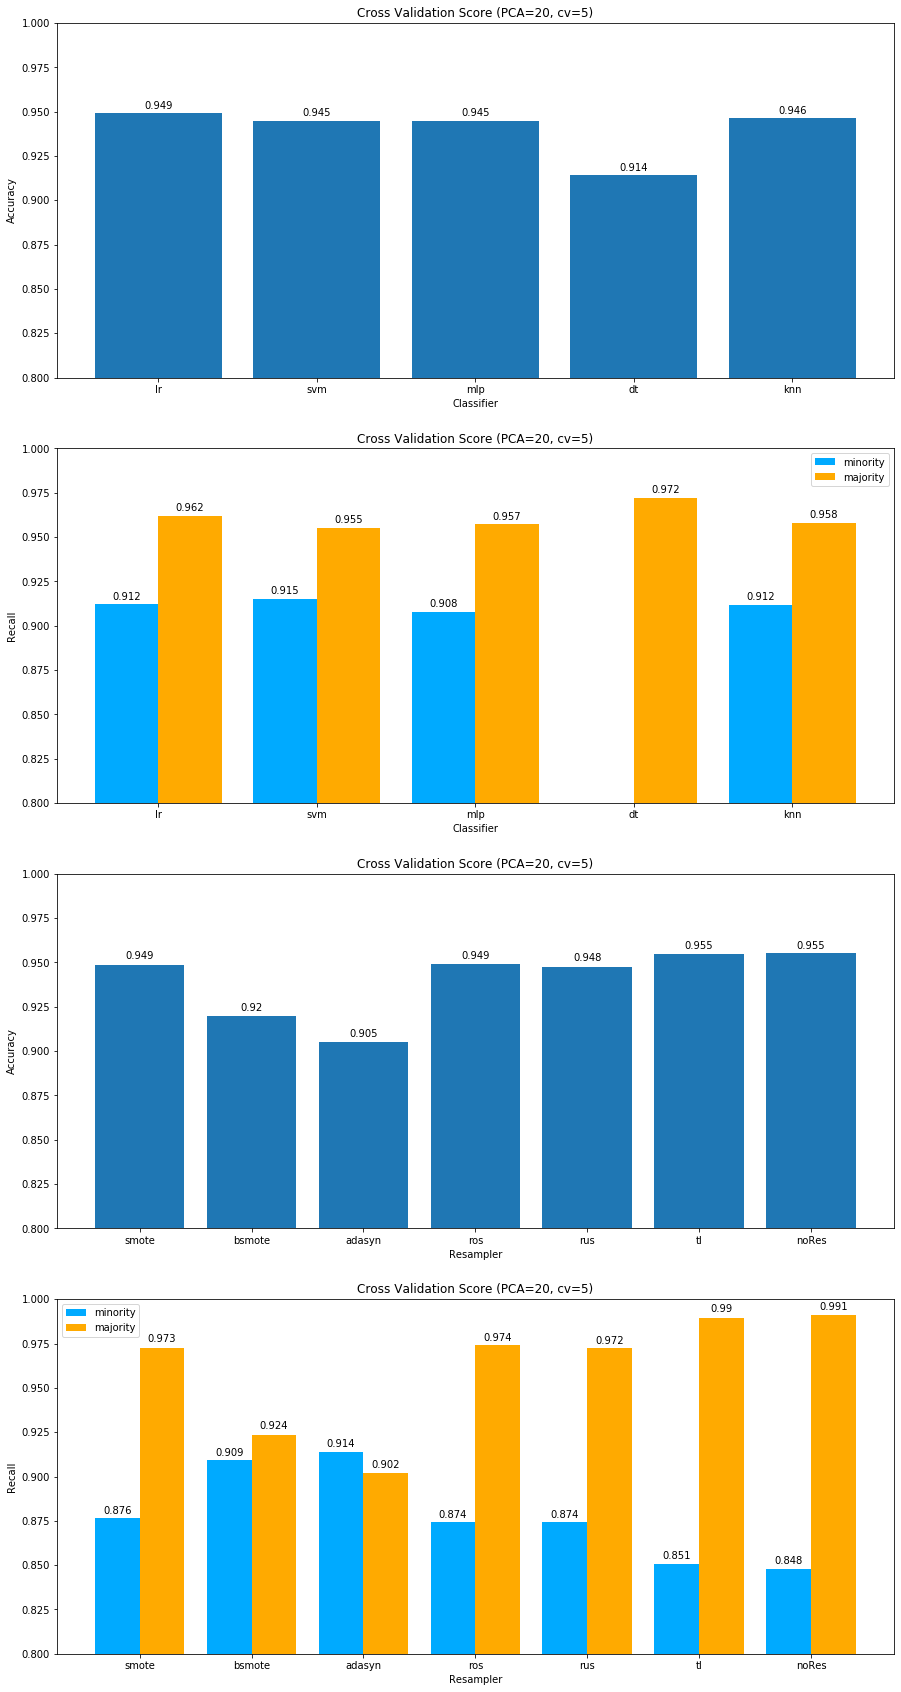

In [59]:
width = 0.40 

x = np.arange(len(clf_name))

fig, ax = plt.subplots(4,1, figsize=(15,30))

# first plot
rect = ax[0].bar(clf_name, clf_accs)
ax[0].axes.set_ylim(0.8, 1)
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Classifier')
ax[0].set_title('Cross Validation Score (PCA=20, cv=5)')
autolabel(rect, ax[0])

# second plot
rect = ax[1].bar(x-width/2, clf_recs, width=width, label='minority', color='#00aaff')
rect2 = ax[1].bar(x+width/2, clf_recs_major, width=width, label='majority', color='#ffaa00')
ax[1].axes.set_ylim(0.8, 1)
ax[1].set_title('Cross Validation Score (PCA=20, cv=5)')
ax[1].set_ylabel('Recall')
ax[1].set_xlabel('Classifier')
ax[1].set_xticks(x)
ax[1].set_xticklabels(clf_name)
ax[1].legend()
autolabel(rect, ax[1])
autolabel(rect2, ax[1])

x = np.arange(len(res_name))

# third plot
rect = ax[2].bar(res_name, res_accs)
ax[2].axes.set_ylim(0.8, 1)
ax[2].set_ylabel('Accuracy')
ax[2].set_xlabel('Resampler')
ax[2].set_title('Cross Validation Score (PCA=20, cv=5)')
autolabel(rect, ax[2])

# fourth plot
rect = ax[3].bar(x-width/2, res_recs, width=width, label='minority', color='#00aaff')
rect2 = ax[3].bar(x+width/2, res_recs_major, width=width, label='majority', color='#ffaa00')
ax[3].axes.set_ylim(0.8, 1)
ax[3].set_title('Cross Validation Score (PCA=20, cv=5)')
ax[3].set_ylabel('Recall')
ax[3].set_xlabel('Resampler')
ax[3].set_xticks(x)
ax[3].set_xticklabels(res_name)
ax[3].legend()
autolabel(rect, ax[3])
autolabel(rect2, ax[3])

In [60]:
index = tuple()
best_score = 0
metric_index = 2 # 0 for accuracy, 1 for precision, 2 for recall, 3 for f1-score
for i in range(len(res)):
    for j in range(len(clf)):
        score = []
        for round_index in range(200):
            for cross in range(5):
                if metric_index == 0:
                    score.append(scores[round_index][cross][i][j][0])
                else:
                    score.append(scores[round_index][cross][i][j][metric_index][1])
        if np.mean(score) > best_score:
            index = (i, j)
            res_index = i
            clf_index = j
            best_score = np.mean(score)

In [61]:
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
majority_scores = []
minority_scores = []

for i in range(len(metrics)):
    majority_cv_score = []
    minority_cv_score = []
    for round_index in range(200):

        for j in range(5):
            if i == 0:
                majority_cv_score.append(scores[round_index][j][res_index][clf_index][0])
                minority_cv_score.append(scores[round_index][j][res_index][clf_index][0])
            else:
                majority_cv_score.append(scores[round_index][j][res_index][clf_index][i][0])
                minority_cv_score.append(scores[round_index][j][res_index][clf_index][i][1])
    majority_scores.append(np.mean(majority_cv_score))
    minority_scores.append(np.mean(minority_cv_score))
    
    

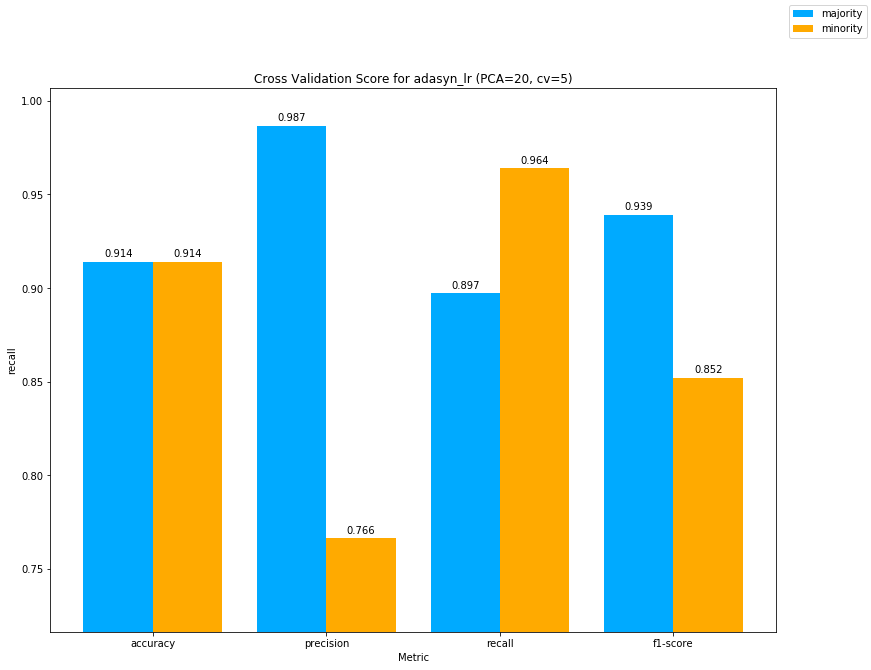

In [62]:
width = 0.40 

x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(13,10))


rect = ax.bar(x - width/2, majority_scores, width=width, label='majority', color='#00aaff')
rect2 = ax.bar(x + width/2, minority_scores, width=width, label='minority', color='#ffaa00')
ax.axes.set_ylim(np.min(minority_scores)-0.05, np.min(np.max(majority_scores)+0.02), 1.0)
ax.set_ylabel(metrics[metric_index])
ax.set_xlabel('Metric')
ax.set_title('Cross Validation Score for {}_{} (PCA=20, cv=5)'.format(res_name[res_index], clf_name[clf_index]))
ax.set_xticks(x)
ax.set_xticklabels(metrics)
autolabel(rect, ax)
autolabel(rect2, ax)
fig.legend()

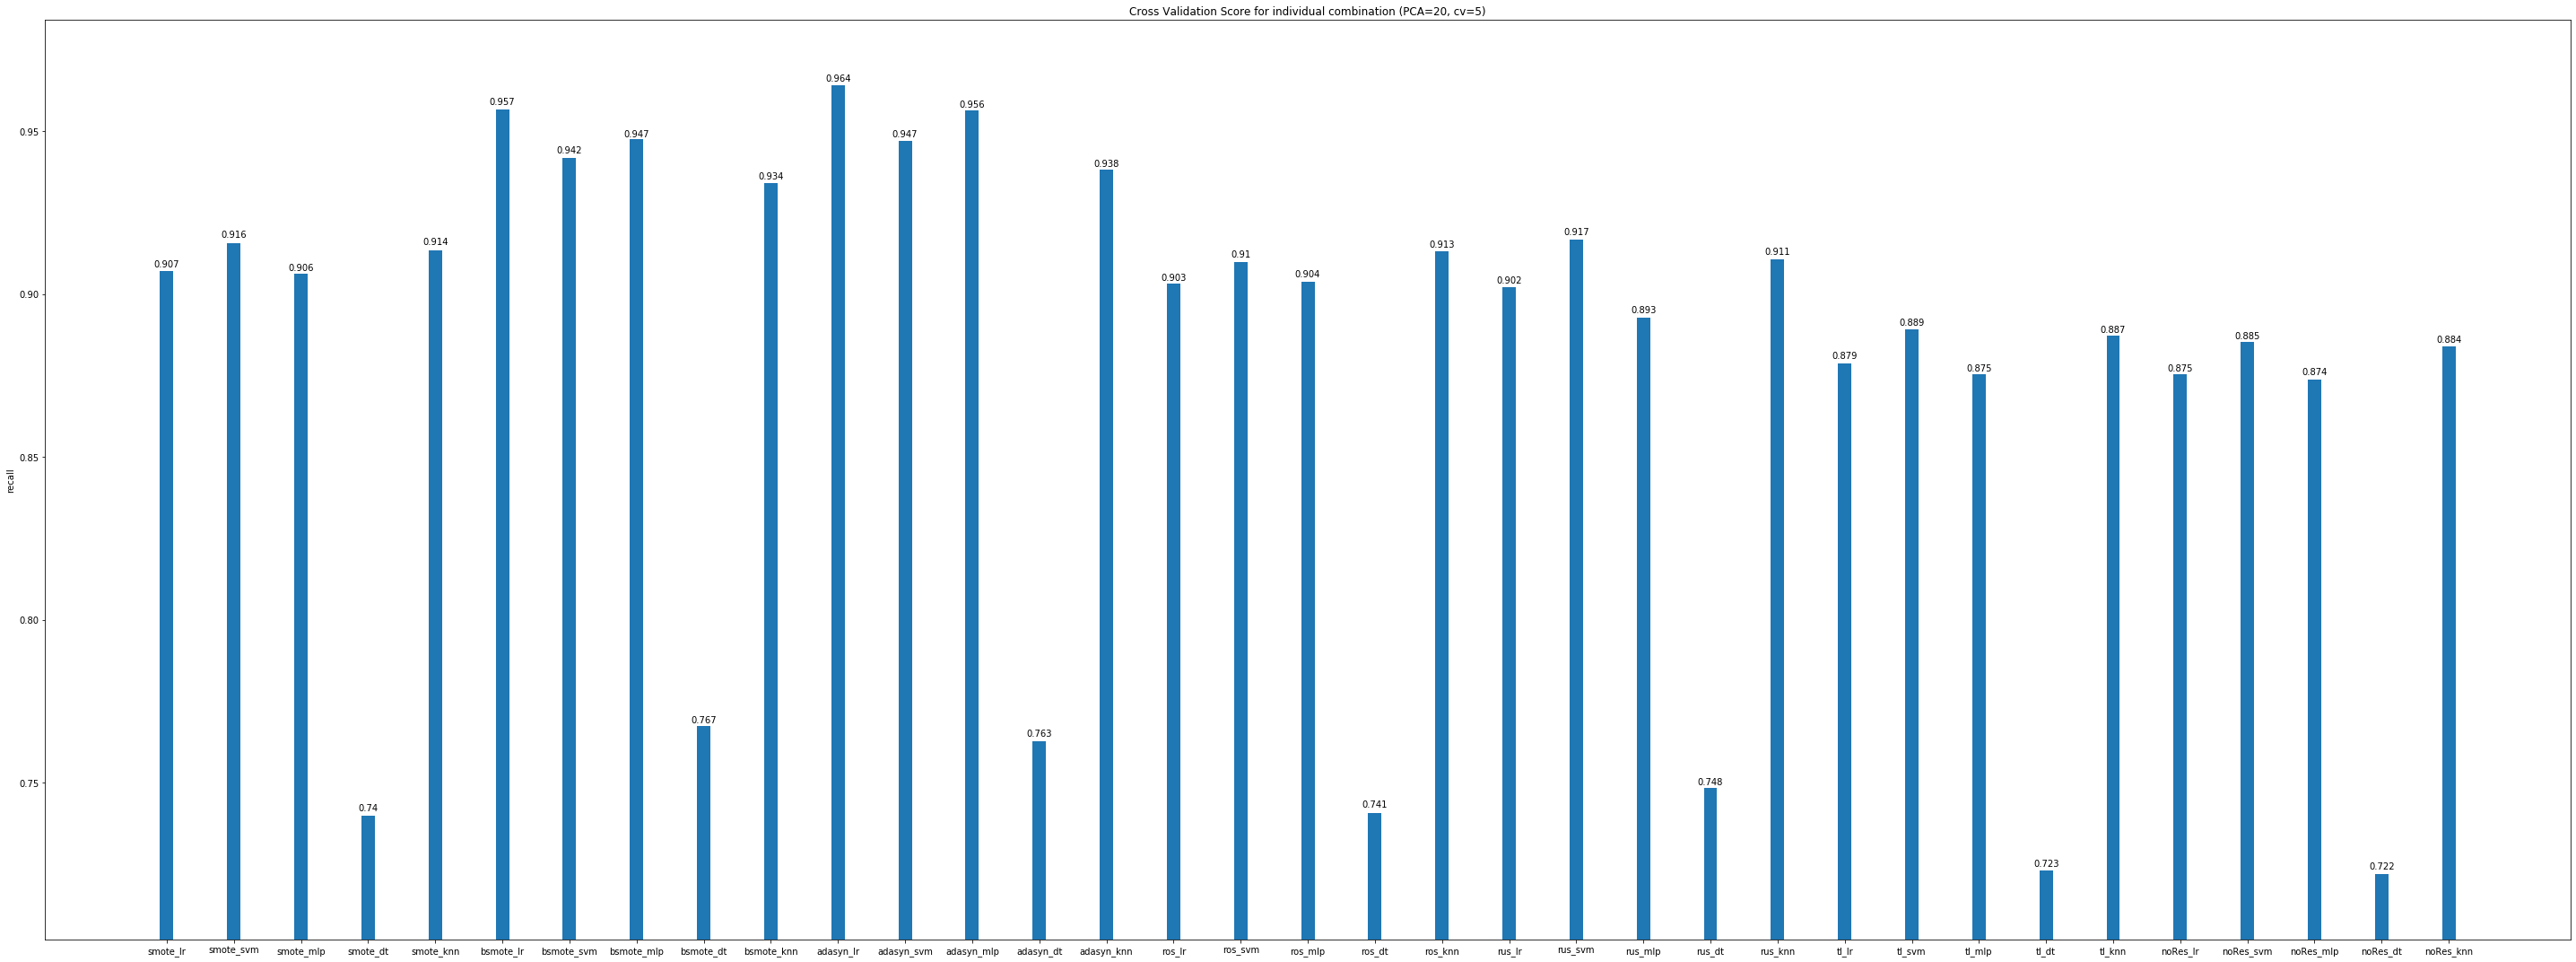

In [63]:
names = []
combinations = []
for i in range(len(res)):
    for j in range(len(clf)):
        names.append(res_name[i]+"_"+clf_name[j])
        score = []
        for round_index in range(200):
            for cross in range(5):
                if metric_index == 0:
                    score.append(scores[round_index][cross][i][j][metric_index])
                else:
                    score.append(scores[round_index][cross][i][j][metric_index][1])
        combinations.append(np.mean(score))
fig, ax = plt.subplots(figsize=(40,15))
x = np.arange(len(names))
width = 0.2 

labels = names
rect = ax.bar(x, combinations, width)
ax.set_ylabel(metrics[metric_index])
ax.set_title('Cross Validation Score for individual combination (PCA=20, cv=5)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.axes.set_ylim(np.min(combinations)-0.02, np.min(np.max(combinations)+0.02), 1.0)
fig.tight_layout()
autolabel(rect, ax)

In [64]:
new_score = [None] * len(res)
for i in range(len(new_score)):
    new_score[i] = [None] * len(clf)
    for j in range(len(new_score[i])):
        new_score[i][j] = [None] * 7
        for k in range(len(new_score[i][j])):
            new_score[i][j][k] = 0
# acc, pre major, pre minor, rec major, rec minor, f1 major, f1 minor

for i in range(len(res)):
    for j in range(len(clf)):
        for round_index in range(200):
            for cross in range(5):
                new_score[i][j][0] += scores[round_index][cross][i][j][0]
                new_score[i][j][1] += scores[round_index][cross][i][j][1][0]
                new_score[i][j][2] += scores[round_index][cross][i][j][1][1]
                new_score[i][j][3] += scores[round_index][cross][i][j][2][0]
                new_score[i][j][4] += scores[round_index][cross][i][j][2][1]
                new_score[i][j][5] += scores[round_index][cross][i][j][3][0]
                new_score[i][j][6] += scores[round_index][cross][i][j][3][1]
        for k in range(7):
            new_score[i][j][k] /= 1000


In [65]:
dataset_name = 'creditcard'

dataset = [dataset_name] * 35
res_label = []
clf_label = []
m1 = []
m2 = []
m3 = []
m4 = []
m5 = []
m6 = []
m7 = []
for i in range(len(res)):
    for j in range(len(clf)):
        m1.append(new_score[i][j][0])
        m2.append(new_score[i][j][1])
        m3.append(new_score[i][j][2])
        m4.append(new_score[i][j][3])
        m5.append(new_score[i][j][4])
        m6.append(new_score[i][j][5])
        m7.append(new_score[i][j][6])
for i in range(35):
    res_label.append(labels[i].split('_')[0])
    clf_label.append(labels[i].split('_')[1])

d = {'dataset' : dataset, 'res': res_label, 'clf': clf_label, 'accuracy' : m1, 'precision-0': m2, 'precision-1': m3, 'recall-0': m4, 'recall-1': m5, 'f1-0': m6, 'f1-1': m7}
k = pd.DataFrame(d)
k.to_csv('{}_result.csv'.format(dataset_name), index=False)